# Sentiment Analysis: Public Relations Departement

Build a predictive model using Natural Language Processing to perform Sentiment Analysis on social media posts and reviews to see customers are satisfied or not.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reviews_df = pd.read_csv("amazon_alexa.tsv", sep="\t")

In [3]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


## Data Exploration

<Axes: >

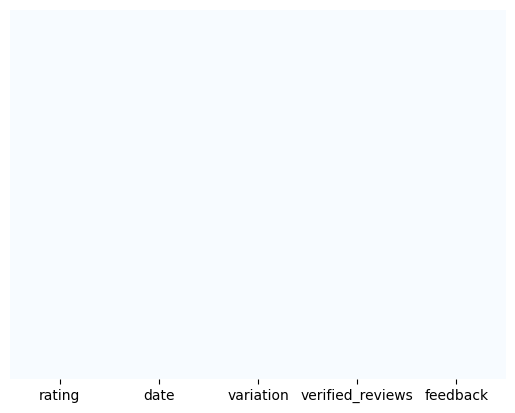

In [6]:
sns.heatmap(reviews_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

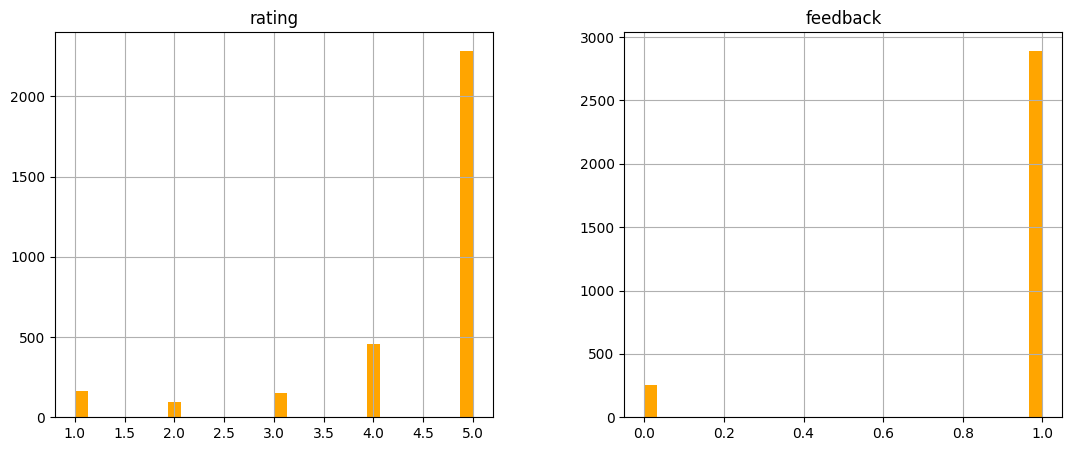

In [7]:
reviews_df.hist(bins=30, figsize=(13, 5), color="orange")

In [8]:
reviews_df["length"] = reviews_df["verified_reviews"].astype(str).apply(len)

reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

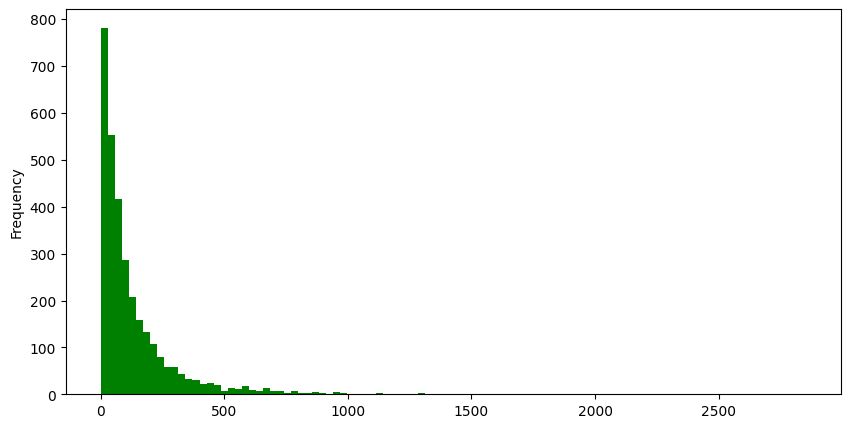

In [9]:
reviews_df["length"].plot.hist(bins=100, figsize=(10, 5), color="green")

In [10]:
reviews_df["length"].describe()

count    3150.000000
mean      132.049206
std       182.100176
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [11]:
# Longest review length.

reviews_df[reviews_df["length"] == 2851]["verified_reviews"].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [12]:
# Shortest review length.

reviews_df[reviews_df["length"] == 1]["verified_reviews"].iloc[0]

'😍'

In [13]:
# Mean of review length.

reviews_df[reviews_df["length"] == 132]["verified_reviews"].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

Now let's create two seperate dataframes for positive and negative reviews.

In [14]:
pd.set_option("display.max_colwidth", 2851)

positive = reviews_df[reviews_df["feedback"] == 1]
negative = reviews_df[reviews_df["feedback"] == 0]

display(negative)
display(positive)

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more accurately then Alexa. I don't see a real need for it in my household, though it was a good bargain on prime day deals.",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get a bose,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even talking to it. I've unplugged it. It feels like it's &#34;spying&#34; on us.,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is the terrible sound quality. A massive difference from the Alexa. Which to us was a big reason we wanted to purchase this.Won’t be buying another until the speaker and sound quality can improve.,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,195
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in between!!",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, checking time, looking up weather. There are many more task to learn. It was simple to set up.",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems.",1,441
3148,5,30-Jul-18,White Dot,"Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing I'd go with the full size echo or make sure you hook the do up to some larger speakers.",1,380


/tmp/ipykernel_64234/3166215332.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(reviews_df, x="feedback", palette=["orange", "green"])


<Axes: xlabel='feedback', ylabel='count'>

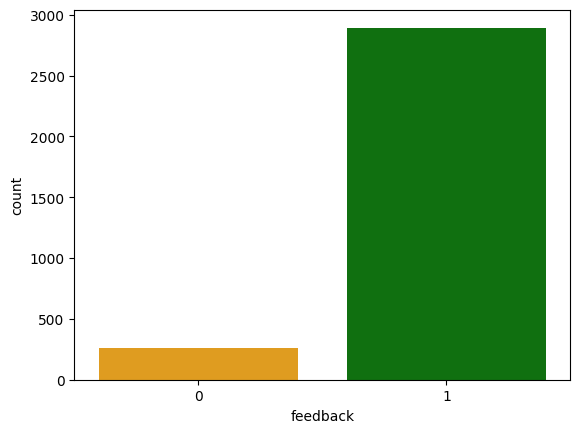

In [15]:
sns.countplot(reviews_df, x="feedback", palette=["orange", "green"])

/tmp/ipykernel_64234/1251982192.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Axes: xlabel='rating', ylabel='count'>

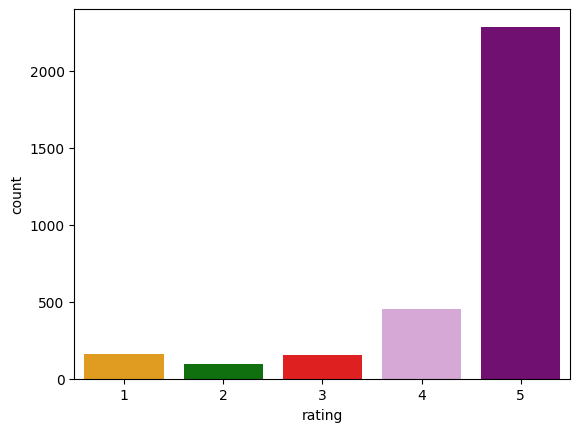

In [16]:
sns.countplot(
    x="rating", data=reviews_df, palette=["orange", "green", "red", "plum", "purple"]
)

/tmp/ipykernel_64234/3687558061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="variation", y="rating", data=reviews_df, palette="viridis")


<Axes: xlabel='variation', ylabel='rating'>

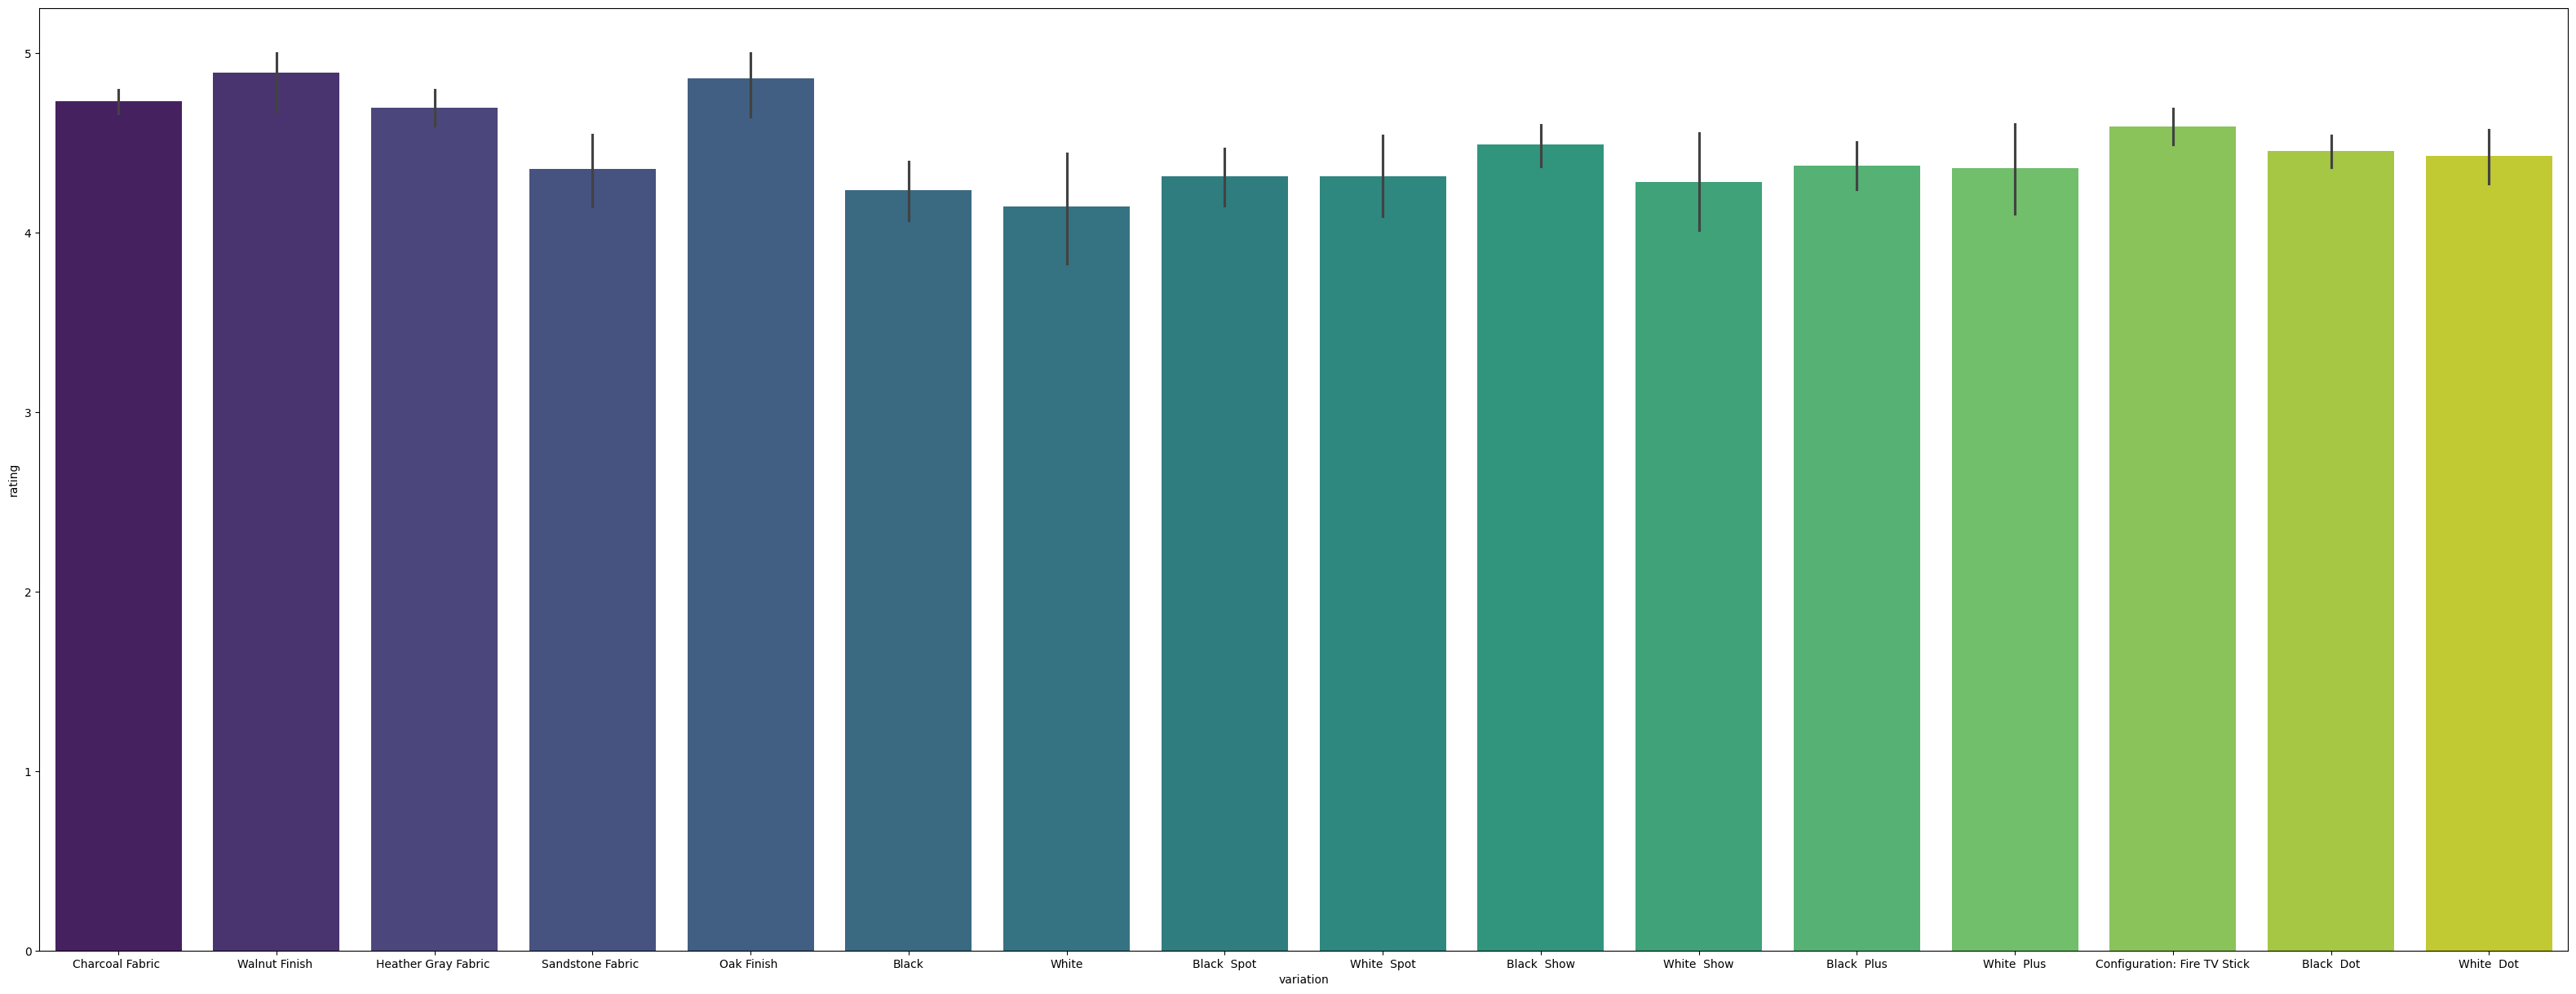

In [17]:
plt.figure(figsize=(40, 15))
sns.barplot(x="variation", y="rating", data=reviews_df, palette="viridis")

In [18]:
sentences = reviews_df["verified_reviews"].astype(str).tolist()
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [19]:
sentences_as_one_string = " ".join(sentences)
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

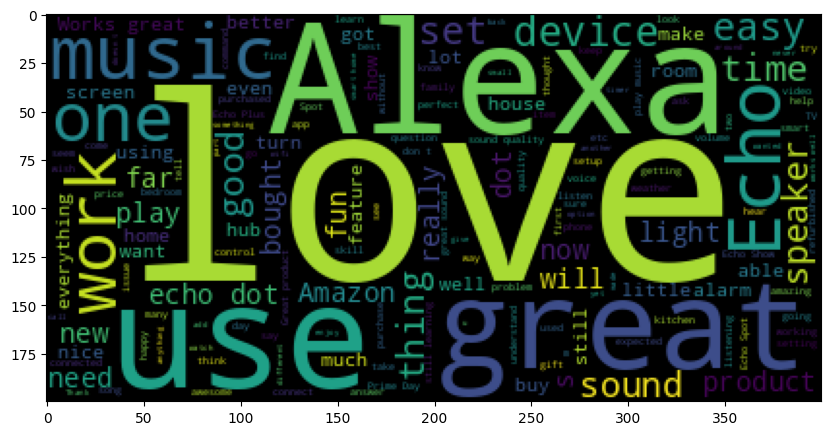

In [20]:
from wordcloud import WordCloud

plt.figure(figsize=(10, 10))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [21]:
negative_list = negative["verified_reviews"].astype(str).tolist()
negative_list

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

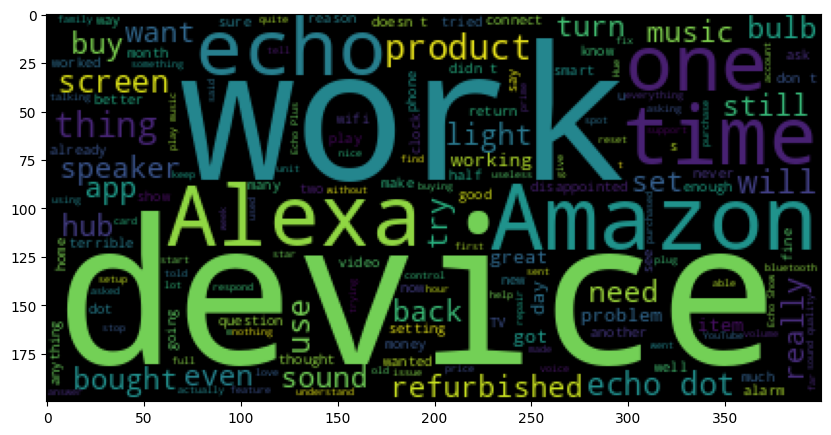

In [22]:
plt.figure(figsize=(10, 10))
plt.imshow(WordCloud().generate(" ".join(negative_list)))

# Data Preprocessing 

In [23]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,195
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [24]:
reviews_df = reviews_df.drop(columns=["date", "rating", "length"], axis=1)
reviews_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1
3,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1
4,Charcoal Fabric,Music,1


In [25]:
variation_dummies = pd.get_dummies(reviews_df["variation"], drop_first=True)
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [26]:
reviews_df.drop(columns=["variation"], axis=1, inplace=True)

In [27]:
reviews_df = pd.concat([reviews_df, variation_dummies], axis=1)
reviews_df.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


# Remove Punctuation from text

In [28]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
test = "I woke up this morning, had tea! I am so happy."

In [30]:
Test_punc_removed = [char for char in test if char not in string.punctuation]
Test_punc_removed

['I',
 ' ',
 'w',
 'o',
 'k',
 'e',
 ' ',
 'u',
 'p',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'h',
 'a',
 'd',
 ' ',
 't',
 'e',
 'a',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y']

In [31]:
Test_punc_removed = "".join(Test_punc_removed)
Test_punc_removed

'I woke up this morning had tea I am so happy'

# Remove Stopwords

In [32]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/barshadeb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords

stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
Test_punc_removed

'I woke up this morning had tea I am so happy'

In [35]:
Test_punc_removed_cleaned = [
    word
    for word in Test_punc_removed.split()
    if word.lower() not in stopwords.words("english")
]

Test_punc_removed_cleaned

['woke', 'morning', 'tea', 'happy']

# Count Vectorisation: Tokenization

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [37]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# Data Cleaning

In [38]:
# Let's define a pipeline to clean the data.


def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed = "".join(Test_punc_removed)
    Test_punc_removed_cleaned = [
        word
        for word in Test_punc_removed.split()
        if word.lower() not in stopwords.words("english")
    ]
    return Test_punc_removed_cleaned

In [39]:
# Let's test the function.

reviews_df_cleaned = reviews_df["verified_reviews"].astype(str).apply(message_cleaning)

In [40]:
print(reviews_df_cleaned.head())

0                                                                                                                           [Love, Echo]
1                                                                                                                                [Loved]
2        [Sometimes, playing, game, answer, question, correctly, Alexa, says, got, wrong, answers, like, able, turn, lights, away, home]
3    [lot, fun, thing, 4, yr, old, learns, dinosaurs, control, lights, play, games, like, categories, nice, sound, playing, music, well]
4                                                                                                                                [Music]
Name: verified_reviews, dtype: object


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(
    reviews_df["verified_reviews"].astype(str)
)

print(*vectorizer.get_feature_names_out())

072318 1 10 100 1000 100X 1010 1030pm 11 1100sf 1220 129 12am 15 150 19 1964 1990s 1990’s 1GB 1rst 1st 2 20 200 2000 2017 2030 229 23 2448 247 24GHZ 24ghz 25 29 299 2999 2Original 2nd 2or 2package 3 30 300 30so 334 34 342nd 3434 34A34 34Alexa 34Alexa34 34Certified 34Computer34 34Dot34 34Drop 34First 34Hub 34I 34Im 34NEVER 34Philips 34Play 34Second 34Skills34 34Tell 34The 34Things 34Thongs 34Try 34Whats 34alexa34 34card34 34cycle 34cycle34 34fixes34 34fun34 34group34 34hear34 34hmm 34hmmm 34it34 34late 34learn 34light34 34lights34 34listen34 34minor 34outlet34 34personal34 34she34 34show 34smart 34smart34 34sorry 34spying34 34the 34thick34 34things 34this 34trouble 34try 34turn 34visual34 34wake34me 34warehouse34 35 360 39 399 3999 3Dots 3rd 3xs 4 40000 45 48 4K 4am 4k 4th 5 50 54 5GHZ 5GHz 5am” 5ghz 5th 6 600 62 672 6th 7 7000 70s 75 7900 8 80s 81 83 85 88 888 8GB 9 90 91 911 99 A1 A19 ABC ABSOLUTELY AF AI AIs ALARM ALEXA ALEXUS ALLRecipes AMAZING AMAZON ANNOYING ANOTHER ASAP ASK AV AV

In [42]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
reviews_countvectorizer.shape

(3150, 5212)

In [44]:
reviews_df.drop(["verified_reviews"], axis=1, inplace=True)

In [45]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
reviews_df = pd.concat([reviews_df, reviews], axis=1)
reviews_df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
0,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,1,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X = reviews_df.drop(columns=["feedback"], axis=1)
y = reviews_df["feedback"]

# Train a Naive Bayes model

In [48]:
X.shape

(3150, 5227)

In [49]:
X.columns = X.columns.astype(str)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [52]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# Assess Trained Model Performance

<Axes: >

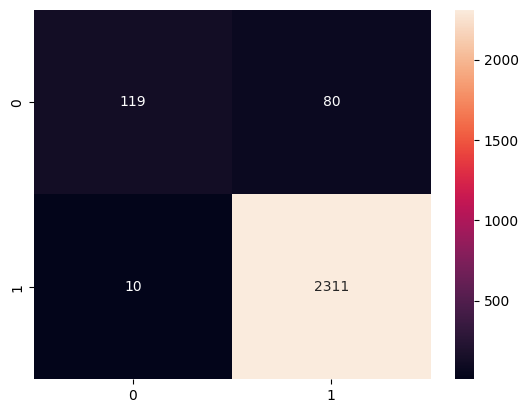

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = NB_classifier.predict(X_train)
y_predict_train

cm = confusion_matrix(y_train, y_predict_train)

sns.heatmap(cm, annot=True, fmt="d")

<Axes: >

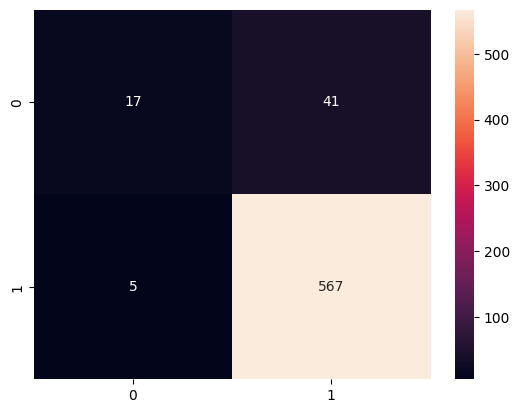

In [56]:
y_predict_test = NB_classifier.predict(X_test)
y_predict_test

cm = confusion_matrix(y_test, y_predict_test)

sns.heatmap(cm, annot=True, fmt="d")

In [58]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.77      0.29      0.42        58
           1       0.93      0.99      0.96       572

    accuracy                           0.93       630
   macro avg       0.85      0.64      0.69       630
weighted avg       0.92      0.93      0.91       630



# Train and evaluate a Logistic Regression model

In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.31      0.46        58
           1       0.93      1.00      0.96       572

    accuracy                           0.93       630
   macro avg       0.92      0.65      0.71       630
weighted avg       0.93      0.93      0.92       630

